# Table of Contents
<a id = 'table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#import_data)
2. [Data Cleaning](#data_clean)
3. [Data Preparation](#data_prep)

# 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [21]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import os

# 1. Import dataset <a id ='import_data'></a>
[Back to top](#table_of_contents)

In [13]:
# dataset is in parquet format and can be read using pyarrow
taxi_jan24_df = pq.read_table('yellow_tripdata_2024-01.parquet').to_pandas()
df = pd.concat([taxi_jan24_df]) #if more dataframes from other months is to be added, add them here 

In [16]:
#printing the dataset and the shape of the dataset 
df.head(30)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.00,0.5,0.00,0.00,1.0,22.70,2.5,0.00
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.50,0.5,3.75,0.00,1.0,18.75,2.5,0.00
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.50,0.5,3.00,0.00,1.0,31.30,2.5,0.00
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.50,0.5,2.00,0.00,1.0,17.00,2.5,0.00
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.50,0.5,3.20,0.00,1.0,16.10,2.5,0.00
5,1,2024-01-01 00:54:08,2024-01-01 01:26:31,1.0,4.70,1.0,N,148,141,1,29.6,3.50,0.5,6.90,0.00,1.0,41.50,2.5,0.00
6,2,2024-01-01 00:49:44,2024-01-01 01:15:47,2.0,10.82,1.0,N,138,181,1,45.7,6.00,0.5,10.00,0.00,1.0,64.95,0.0,1.75
7,1,2024-01-01 00:30:40,2024-01-01 00:58:40,0.0,3.00,1.0,N,246,231,2,25.4,3.50,0.5,0.00,0.00,1.0,30.40,2.5,0.00
8,2,2024-01-01 00:26:01,2024-01-01 00:54:12,1.0,5.44,1.0,N,161,261,2,31.0,1.00,0.5,0.00,0.00,1.0,36.00,2.5,0.00
9,2,2024-01-01 00:28:08,2024-01-01 00:29:16,1.0,0.04,1.0,N,113,113,2,3.0,1.00,0.5,0.00,0.00,1.0,8.00,2.5,0.00


In [17]:
df.shape

(2964624, 19)

In [18]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [ ]:
#dropping the columns that are not needed
df = df[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
         'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'total_amount']]
df.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10
5,2024-01-01 00:54:08,2024-01-01 01:26:31,1.0,4.70,1.0,148,141,1,41.50
6,2024-01-01 00:49:44,2024-01-01 01:15:47,2.0,10.82,1.0,138,181,1,64.95
7,2024-01-01 00:30:40,2024-01-01 00:58:40,0.0,3.00,1.0,246,231,2,30.40
8,2024-01-01 00:26:01,2024-01-01 00:54:12,1.0,5.44,1.0,161,261,2,36.00
9,2024-01-01 00:28:08,2024-01-01 00:29:16,1.0,0.04,1.0,113,113,2,8.00


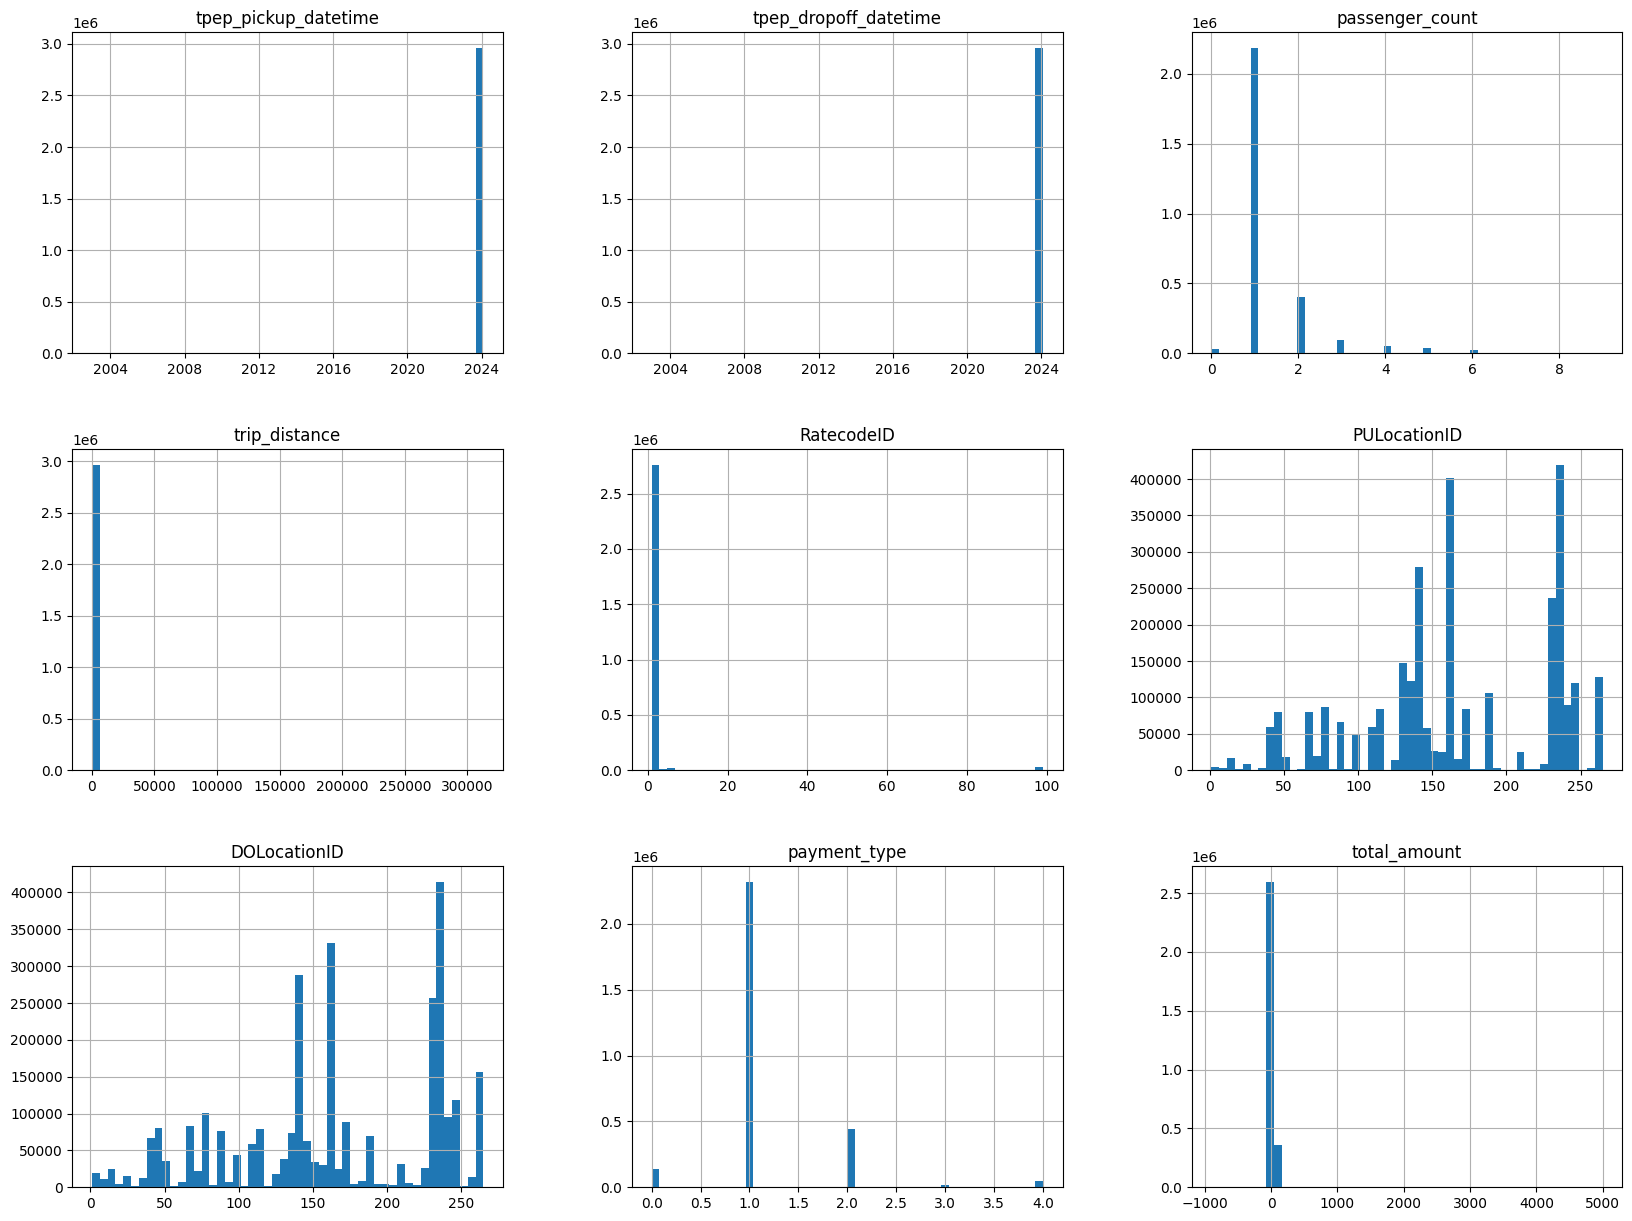

In [ ]:
#plot a histogram for each feature
df.hist(bins=50, figsize=(20,15))
plt.show()

In [23]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     2663350
2.0       98713
99.0      28663
5.0       19410
3.0        7954
4.0        6365
6.0           7
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

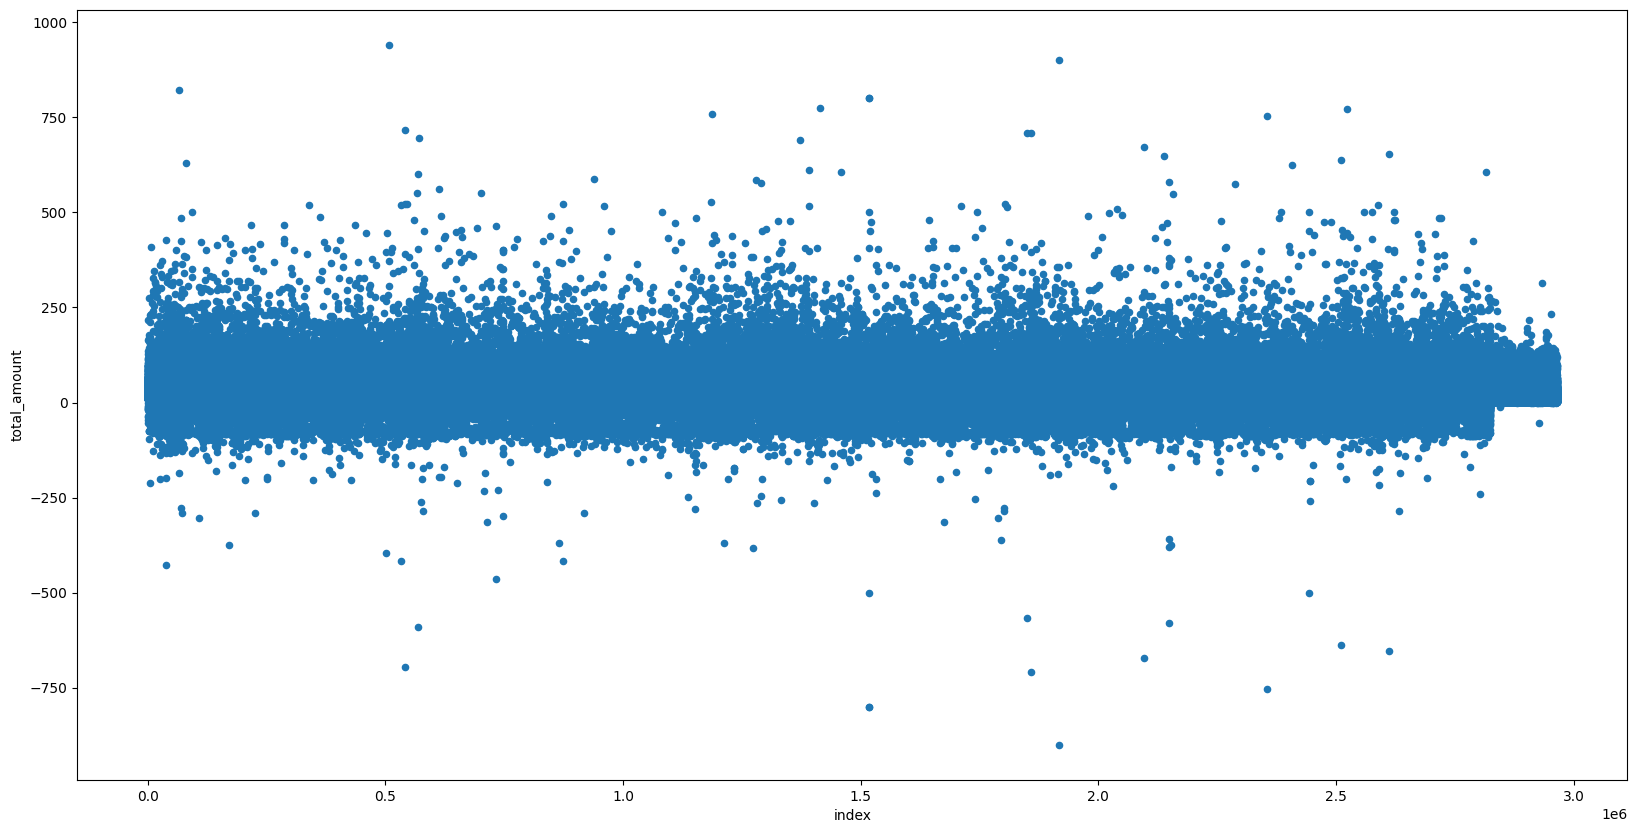

In [27]:
#plot a graph for total_amount column
df[df['total_amount']<1000].reset_index().plot(kind='scatter', x='index', y='total_amount', figsize=(20,10))


As there are many outliers, like negative values and very high total amounts, we will not clean the data for this

(35504, 9)


<Axes: xlabel='index', ylabel='total_amount'>

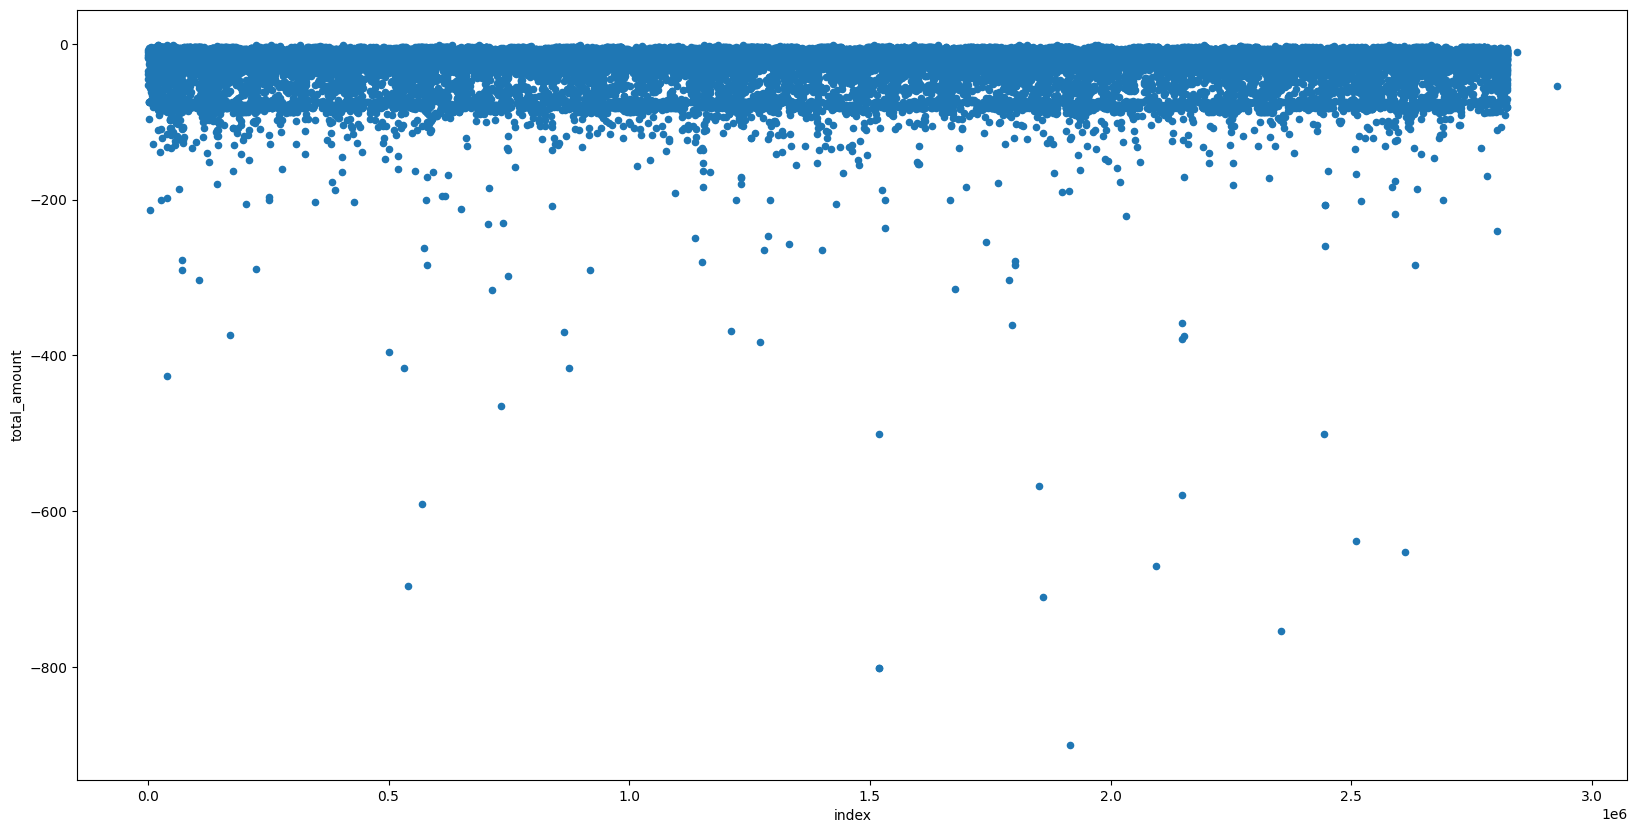

In [30]:
print(df[df['total_amount'] < 0].shape)
df[df['total_amount']<0].reset_index().plot(kind='scatter', x='index', y='total_amount', figsize=(20,10))

In [33]:
#check the payment_type of the negative total_amount
df[df['total_amount'] < 0]['payment_type'].value_counts()

#df[df['total_amount'] < 0].head(20)

payment_type
4    21406
2     8326
3     5741
1       29
0        2
Name: count, dtype: int64

In [35]:
#also check for values that are zero
print(df[df['total_amount']==0].shape)
df[df['total_amount']==0].head(20)

(416, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
854,2024-01-01 00:27:42,2024-01-01 00:28:49,1.0,0.2,1.0,239,143,4,0.0
29224,2024-01-01 10:01:27,2024-01-01 10:01:27,1.0,0.0,5.0,239,264,2,0.0
39191,2024-01-01 13:46:41,2024-01-01 14:12:06,1.0,0.0,99.0,42,216,1,0.0
39591,2024-01-01 13:03:22,2024-01-01 13:03:24,1.0,0.0,1.0,264,264,2,0.0
39592,2024-01-01 13:05:28,2024-01-01 13:05:35,1.0,0.0,1.0,193,193,2,0.0
66332,2024-01-01 21:33:28,2024-01-01 21:33:46,1.0,0.0,1.0,132,132,4,0.0
73242,2024-01-02 06:48:53,2024-01-02 06:49:13,1.0,0.0,1.0,264,264,3,0.0
80414,2024-01-02 08:11:15,2024-01-02 08:12:10,1.0,0.0,1.0,193,193,2,0.0
85942,2024-01-02 10:30:09,2024-01-02 10:34:13,1.0,0.0,5.0,138,138,4,0.0
93381,2024-01-02 12:04:15,2024-01-02 12:31:59,1.0,5.5,1.0,236,90,3,0.0


trip_distance
0.00     287
0.10      21
0.20       8
0.90       8
0.50       7
1.60       6
1.00       5
0.80       5
0.70       5
1.10       4
0.30       4
1.30       4
0.60       4
0.40       3
3.00       3
2.50       3
2.40       2
3.40       2
3.80       2
1.80       2
1.70       2
10.70      2
12.10      1
25.10      1
1.40       1
12.80      1
1.74       1
2.70       1
18.40      1
15.00      1
5.30       1
3.30       1
2.90       1
17.10      1
4.20       1
3.50       1
4.00       1
21.90      1
16.50      1
26.20      1
13.60      1
7.70       1
3.60       1
5.50       1
5.80       1
4.90       1
8.10       1
1.20       1
7.00       1
Name: count, dtype: int64


<Axes: >

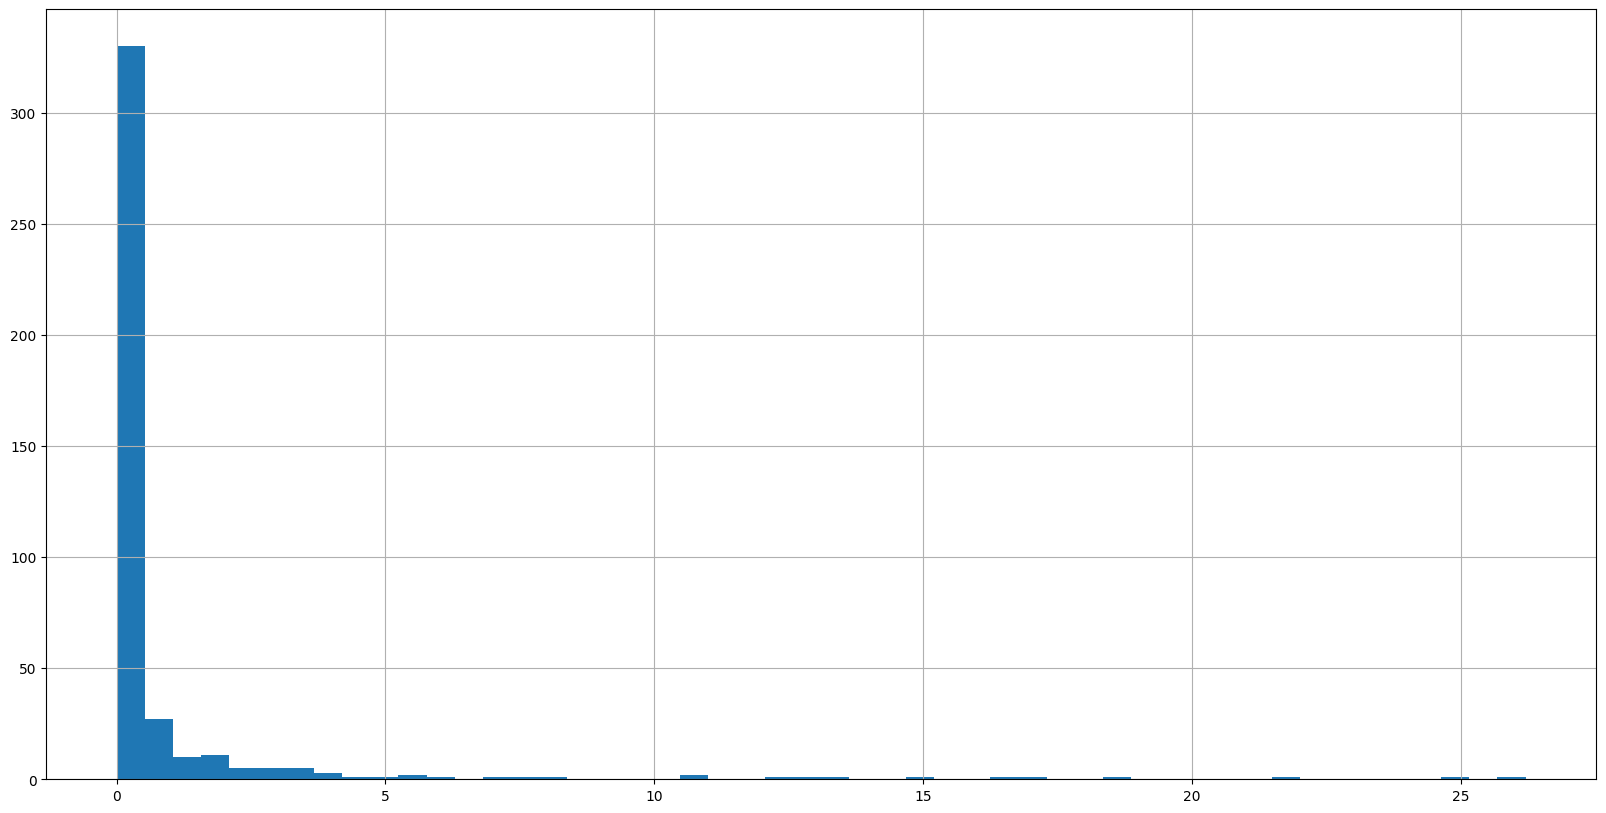

In [37]:
#check the trip_distance of the zero total_amount
print(df[df['total_amount']==0]['trip_distance'].value_counts())
df[df['total_amount']==0]['trip_distance'].hist(bins=50, figsize=(20,10))

<Axes: xlabel='index', ylabel='trip_distance'>

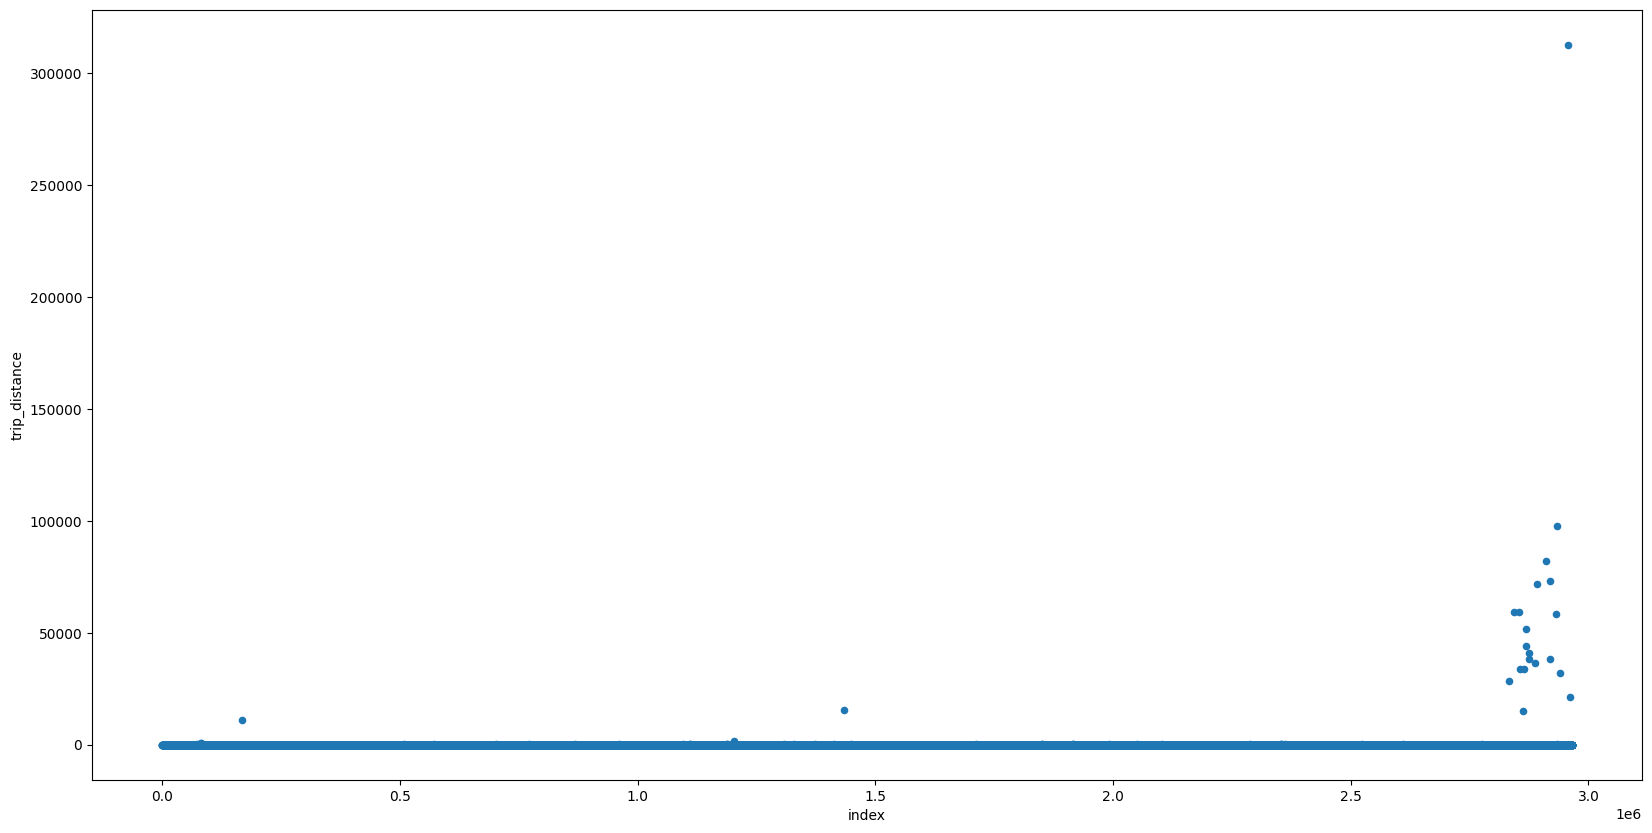

In [38]:
df.reset_index().plot(kind='scatter', x='index', y='trip_distance', figsize=(20,10))

<bound method DataFrame.value_counts of         tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1850351  2024-01-21 18:08:49   2024-01-21 20:15:48              1.0   
1916204  2024-01-22 16:40:43   2024-01-22 19:11:20              1.0   
2354216  2024-01-26 23:59:09   2024-01-27 02:45:39              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
1850351         110.46         4.0           132           265             2   
1916204         157.25         5.0           265           265             2   
2354216         120.76         4.0           143           265             4   

         total_amount  
1850351       -567.72  
1916204       -900.00  
2354216       -753.74  >


<Axes: xlabel='index', ylabel='trip_distance'>

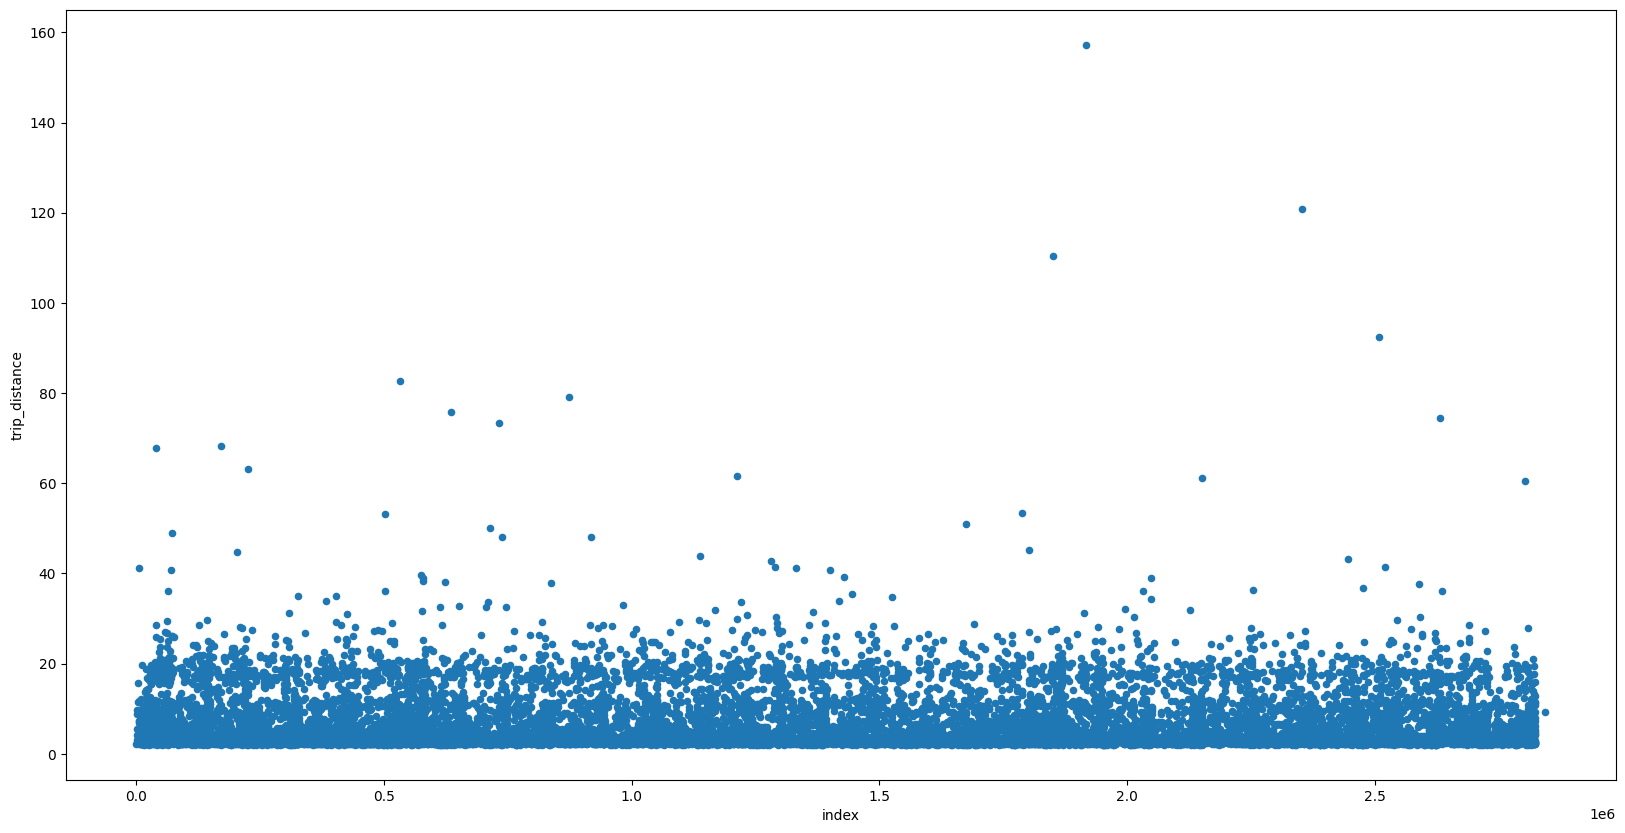

In [44]:
print(df[(df['total_amount'] < 0) & (df['trip_distance'] > 100)].value_counts)
df[(df['total_amount']<0)&(df['trip_distance']>2)].reset_index().plot(kind='scatter', x='index', y='trip_distance', figsize=(20,10))

# 2. Data Cleaning <a id = data_clean></a>
[Back to top](#table-of-contents)

In [46]:
#clean the data to remove the negative values and zero values in total_amount and total_amount to stay less than 200
df = df[(df['total_amount'] >= 0) & (df['total_amount'] < 200)]

(2926691, 9)


<Axes: xlabel='index', ylabel='total_amount'>

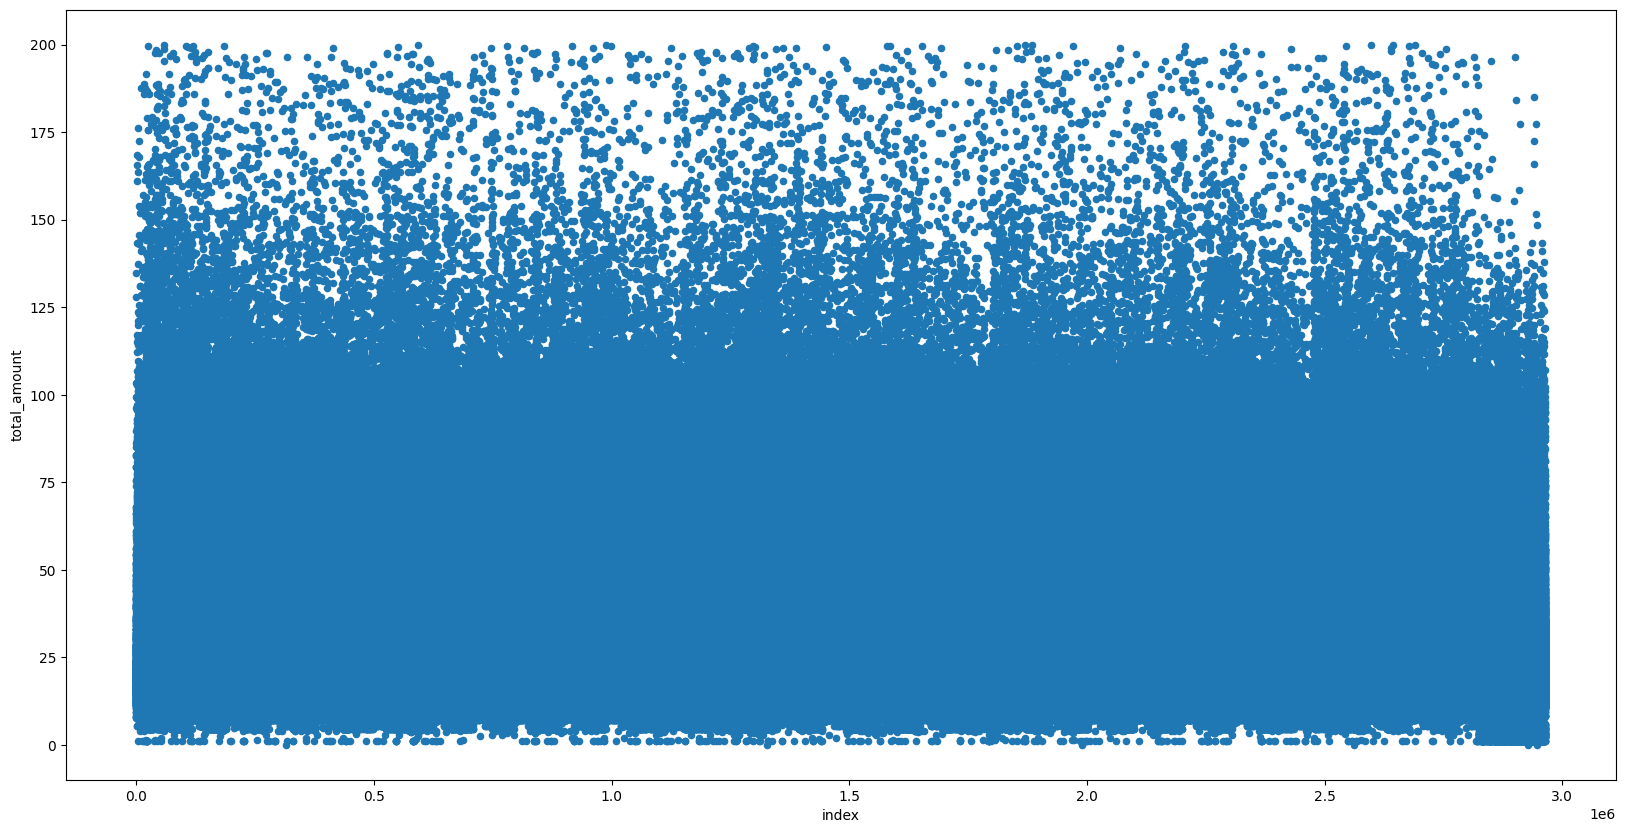

In [48]:
print(df.shape)
df.reset_index().plot(kind='scatter', x='index', y='total_amount', figsize=(20,10))

In [50]:
#all the columns that have missing values
df.isna().sum()

tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140142
trip_distance                 0
RatecodeID               140142
PULocationID                  0
DOLocationID                  0
payment_type                  0
total_amount                  0
dtype: int64

# 3. Data Preparation <a id = 'data_prep'></a>
[Back to top](#table-of-contents)

In [72]:
df_prepared = df.copy()

In [73]:
df_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
total_amount                    float64
dtype: object

In [74]:
#change the data types of tpep_pickup_datetime and tpep_dropoff_datetime to datetime
df_prepared['tpep_pickup_datetime'] = pd.to_datetime(df_prepared['tpep_pickup_datetime'])
df_prepared['tpep_dropoff_datetime'] = pd.to_datetime(df_prepared['tpep_dropoff_datetime'])

In [82]:
#change the data types of RatecodeID, PULocationID, DOLocationID, and payment_type to category
df_prepared['RatecodeID'] = df_prepared['RatecodeID'].astype('str')
df_prepared['PULocationID'] = df_prepared['PULocationID'].astype('str')
df_prepared['DOLocationID'] = df_prepared['DOLocationID'].astype('str')
df_prepared['payment_type'] = df_prepared['payment_type'].astype('str')

# fill NaN values in passenger_count with 0 before converting to int
df_prepared['passenger_count'] = df_prepared['passenger_count'].fillna(0).astype('int')

In [83]:
df_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [90]:
#create a new features called tansaction_date, transaction_month, transaction_day and transaction_hour from the tpep_pickup_datetime
df_prepared['transaction_date'] = df_prepared['tpep_pickup_datetime'].dt.date
df_prepared['transaction_year'] = df_prepared['tpep_pickup_datetime'].dt.year
df_prepared['transaction_month'] = df_prepared['tpep_pickup_datetime'].dt.month
df_prepared['transaction_day'] = df_prepared['tpep_pickup_datetime'].dt.day
df_prepared['transaction_hour'] = df_prepared['tpep_pickup_datetime'].dt.hour


In [91]:
df_prepared.head(20)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,trip_duration,transaction_date,transaction_month,transaction_day,transaction_hour,transaction_year
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1.0,186,79,2,22.70,19.800000,2024-01-01,1,1,0,2024
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.80,1.0,140,236,1,18.75,6.600000,2024-01-01,1,1,0,2024
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.70,1.0,236,79,1,31.30,17.916667,2024-01-01,1,1,0,2024
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1,1.40,1.0,79,211,1,17.00,8.300000,2024-01-01,1,1,0,2024
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1,0.80,1.0,211,148,1,16.10,6.100000,2024-01-01,1,1,0,2024
5,2024-01-01 00:54:08,2024-01-01 01:26:31,1,4.70,1.0,148,141,1,41.50,32.383333,2024-01-01,1,1,0,2024
6,2024-01-01 00:49:44,2024-01-01 01:15:47,2,10.82,1.0,138,181,1,64.95,26.050000,2024-01-01,1,1,0,2024
7,2024-01-01 00:30:40,2024-01-01 00:58:40,0,3.00,1.0,246,231,2,30.40,28.000000,2024-01-01,1,1,0,2024
8,2024-01-01 00:26:01,2024-01-01 00:54:12,1,5.44,1.0,161,261,2,36.00,28.183333,2024-01-01,1,1,0,2024
9,2024-01-01 00:28:08,2024-01-01 00:29:16,1,0.04,1.0,113,113,2,8.00,1.133333,2024-01-01,1,1,0,2024


In [93]:
print(df_prepared['transaction_year'].value_counts())
print(df_prepared['transaction_month'].value_counts()) 

transaction_year
2024    2926677
2023         10
2009          3
2002          1
Name: count, dtype: int64
transaction_month
1     2926677
12         11
2           3
Name: count, dtype: int64


In [102]:
#we only want the data for the year 2024 and month 1
df_prepared = df_prepared[df_prepared['transaction_year'] == 2024]
df_prepared = df_prepared[df_prepared['transaction_month'] == 1]

In [103]:
df_prepared.head(20)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,trip_duration,transaction_date,transaction_month,transaction_day,transaction_hour,transaction_year
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1.0,186,79,2,22.70,19.800000,2024-01-01,1,1,0,2024
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.80,1.0,140,236,1,18.75,6.600000,2024-01-01,1,1,0,2024
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.70,1.0,236,79,1,31.30,17.916667,2024-01-01,1,1,0,2024
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1,1.40,1.0,79,211,1,17.00,8.300000,2024-01-01,1,1,0,2024
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1,0.80,1.0,211,148,1,16.10,6.100000,2024-01-01,1,1,0,2024
5,2024-01-01 00:54:08,2024-01-01 01:26:31,1,4.70,1.0,148,141,1,41.50,32.383333,2024-01-01,1,1,0,2024
6,2024-01-01 00:49:44,2024-01-01 01:15:47,2,10.82,1.0,138,181,1,64.95,26.050000,2024-01-01,1,1,0,2024
7,2024-01-01 00:30:40,2024-01-01 00:58:40,0,3.00,1.0,246,231,2,30.40,28.000000,2024-01-01,1,1,0,2024
8,2024-01-01 00:26:01,2024-01-01 00:54:12,1,5.44,1.0,161,261,2,36.00,28.183333,2024-01-01,1,1,0,2024
9,2024-01-01 00:28:08,2024-01-01 00:29:16,1,0.04,1.0,113,113,2,8.00,1.133333,2024-01-01,1,1,0,2024


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'trip_duration'}>],
       [<Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>,
        <Axes: title={'center': 'transaction_hour'}>],
       [<Axes: title={'center': 'transaction_year'}>, <Axes: >, <Axes: >]],
      dtype=object)

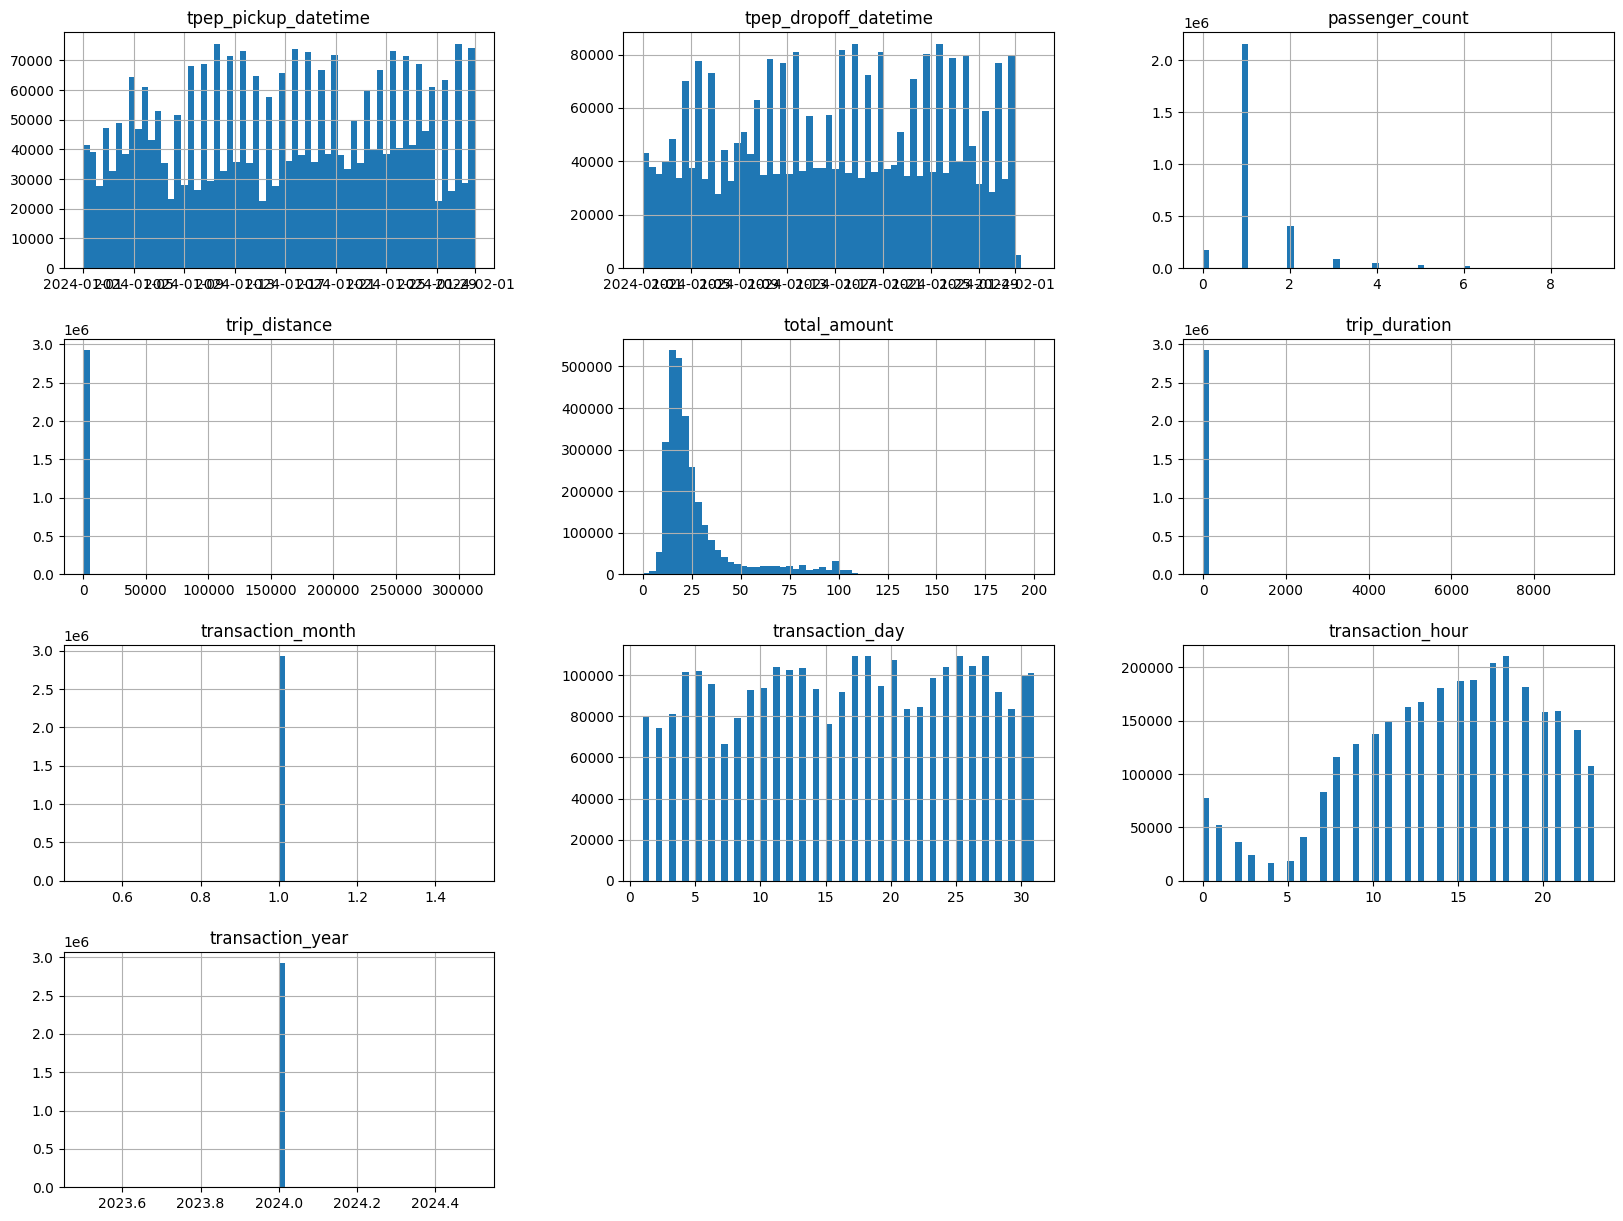

In [104]:
df_prepared.hist(figsize=(20,15), bins=60)